<a href="https://colab.research.google.com/github/WIMLDS-Yaounde/Data_visualisation_with_python/blob/main/WIMLDS_YDE_Tutorial_01__Data_visualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.
When you start a new project, you will often be doing an Exploratory Data Analysis(EDA) to gain some insights into your data. Creating visualizations will help you making things clearer and easier to understand, especially with larger, high dimensional datsets. 
There are many python librairies that can be used to create  your Data Visualization quite easily No matter if you want to create interactive, live or highly customized plots python has an excellent library for you. In this tutorial, we will lear how to create basic plots using Matplotlib, Pandas visualization, Seaborn and Plotly.

## Import libraries

Various libraries that will be used for this task are imported here. 
If you get errors when trying to import libraries, make sure you install them first. 

In [ ]:
import plotly.express as px       #for generating interactive plots
import numpy as np  #popular library that helps to manipulate arrays
import pandas as pd #very flexible for data manipulation
import seaborn as sns #for visualizing statistical data
import matplotlib.pyplot as plt #main python library for generating static, animated and interactive plots.

## Data Import

The [iris data set](https://archive.ics.uci.edu/ml/datasets/iris) will be used in this tutorial. This is one of the oldest and most used datasets in the statistics and machine learning community.

Before exploring the data using various visualization tools, we import it from our computer (or drive) using the pandas package and check its structure (dimension).

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

link =  'drive/MyDrive/'
iris = pd.read_csv(link+'iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Mounted at /content/drive


###### Use pandas functions to glance through the dataset

In [ ]:
print('Shape of iris data {}'.format(iris.shape)) #dataset contains 150 instances described by 5 columns
iris.head()                                       #view the first 5 instances of the dataset

#By printing the first 5 elements of the dataset, we see that there is a non-numerical (categorical) column called class that describes the class type of each iris flower. 

Shape of iris data (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data visualization

#### First we investigate the number of unique classes in iris by counting their occurence and plotting using bar plots

Text(0.5, 1.0, 'Plot of Number of unique classes using Seaborn package')

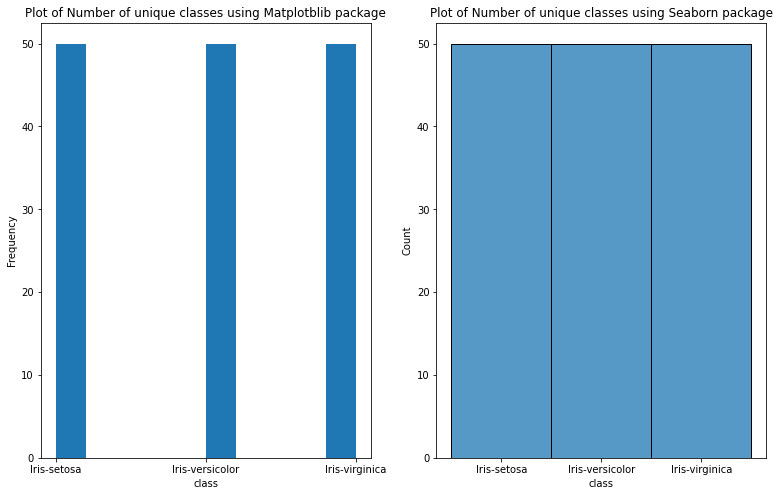

In [ ]:
'''
Using Matplolib and Seaborn on the same frame. 
In order to plot each figure on a single frame, you can use
fig, ax = plt.suplots(1,1): that is, creating a frame with a single row and column
'''
# create figure and axis. Set the size of the figure
fig, ax = plt.subplots(1, 2, figsize=(13,8))
# plot histogram
ax[0].hist(iris['class'])
# set title and labels
ax[0].set_title('Plot of Number of unique classes using Matplotblib package')
ax[0].set_xlabel('class')
ax[0].set_ylabel('Frequency')

#Same plot using seaborn package
sns.histplot(iris['class'], ax=ax[1]).set_title('Plot of Number of unique classes using Seaborn package')

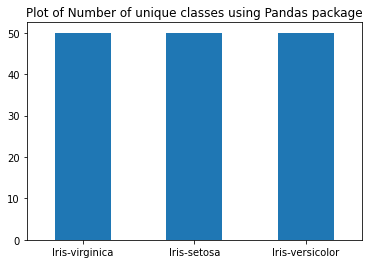

In [ ]:
'''
We repeat the count plot using pandas 
'''
# create figure and axis. Set the size of the figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))
# plot histogram

iris['class'].value_counts().plot(kind='bar', rot=0, title='Plot of Number of unique classes using Pandas package') #rot = 0: is the value of the angle used to rotate the xlabels of each bar

In [ ]:
'''
We repeat the count plot using plotly
'''
count_plot = pd.DataFrame(iris['class'].value_counts()).reset_index().rename(columns = {'class':'count','index':'class'}) #we create a new dataframe to store the counts of each flower class using pandas 
px.bar(count_plot, x='class',y='count',width=600, height=400, title=' Interactive plot of Number of unique classes using Plotly package')

####Pie charts: An alternative to barplots are pie charts to explore the frequency of occurence of each flower class

In [ ]:
'''
Using Matplotlib
'''
count_plot = pd.DataFrame(iris['class'].value_counts()).reset_index().rename(columns = {'class':'count','index':'class'}) #we create a new dataframe to store the counts of each flower class using pandas 
fig = px.pie(count_plot, values='count', names='class', title='Number of samples per class',width=600, height=400)
fig.show()


#### Next, we investigate the parameters (sepal length, petal length) of the different flower classes with the use of scatter plots.

#### Scatter Plots

<Figure size 432x288 with 0 Axes>

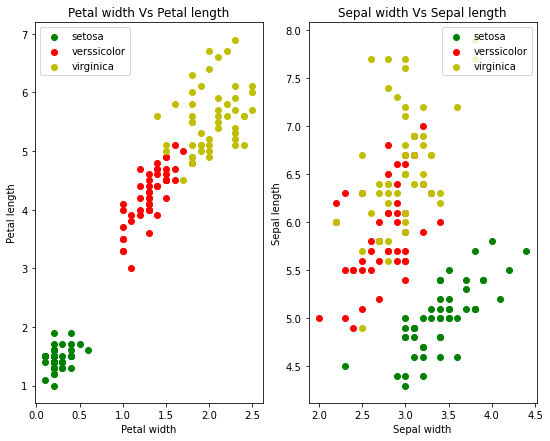

In [ ]:
'''
View the petal lengths and widths of each distinct class
Using Matplotlib
'''
#To create a dataset of each class

Iris_setosa=iris[iris["class"]=="Iris-setosa"]
Iris_versicolor=iris[iris["class"]=="Iris-versicolor"]
Iris_virginica=iris[iris["class"]=="Iris-virginica"]
#Scatter plot taking into account de species names

plt.figure()
fig,axes = plt.subplots(1,2, figsize=(9,7))  #another declaration of dashbord

axes[0].scatter( x=Iris_setosa["petal_width"], y=Iris_setosa["petal_length"],  label="setosa", color="g")
axes[0].scatter( x=Iris_versicolor["petal_width"], y=Iris_versicolor["petal_length"],  label="verssicolor", color="r")
axes[0].scatter( x=Iris_virginica["petal_width"], y=Iris_virginica["petal_length"], label="virginica", color="y")


axes[1].scatter( x=Iris_setosa["sepal_width"], y=Iris_setosa["sepal_length"], label="setosa", color="g")
axes[1].scatter( x=Iris_versicolor["sepal_width"], y=Iris_versicolor["sepal_length"], label="verssicolor", color="r")
axes[1].scatter( x=Iris_virginica["sepal_width"], y=Iris_virginica["sepal_length"], label="virginica", color="y")

axes[0].set(title="Petal width Vs Petal length",  xlabel="Petal width", ylabel="Petal length" )
axes[1].set(title="Sepal width Vs Sepal length", xlabel="Sepal width", ylabel="Sepal length")

axes[0].legend()
axes[1].legend(loc='upper right') #specify the location of the legend

##########################################################################################################################
# An alternative for creating distinct datasets before plotting, could be using a for loop

colors = {'Iris-setosa':'g', 'Iris-versicolor':'b', 'Iris-virginica':'r'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point by using a for loop
for i in range(len(iris)):
    ax.scatter(iris['petal_width'][i], iris['petal_length'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Plot of petal width agains petal length')
ax.set_ylabel('petal_length')
ax.set_xlabel('petal_width')


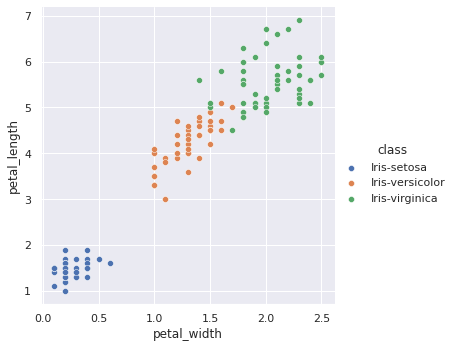

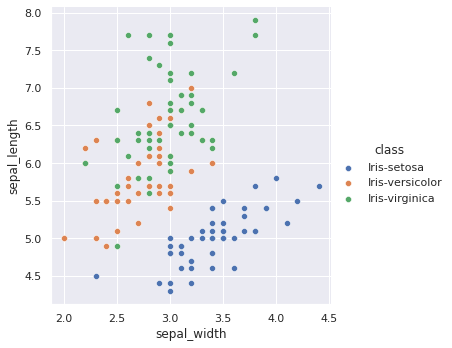

In [ ]:
'''
Repeating the scatter plot above using seaborn package
'''

sns.set(rc={'figure.figsize':(9,7)}) #Can set a figure size using seaborn
g = sns.FacetGrid(iris,  hue="class", height=5)
g.map(sns.scatterplot, "petal_width", "petal_length")
g.add_legend()

g = sns.FacetGrid(iris,  hue="class", height=5)
g.map(sns.scatterplot, "sepal_width", "sepal_length")
g.add_legend()

In [ ]:
'''
We repeat the scatter plot using Plotly package 
We plot all 4 parameters on the same figure. 
We plot the sepal width against the sepal length where each class has a seperate color
The size of each dot is represented by the petal length and 
the petal width appears when we hover the mouse over each dot
'''
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="class",
                 size='petal_length', hover_data=['petal_width'],width=800, height=600, title=' Interactive scatter plot using Plotly package')
fig.show()

#### Line Chart

Line charts are drawn by joining observations in the space , one after the other, with a line.

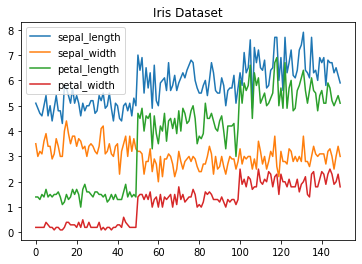

In [ ]:
'''
Using Matplolib, we only call the plot method.
We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.
'''
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

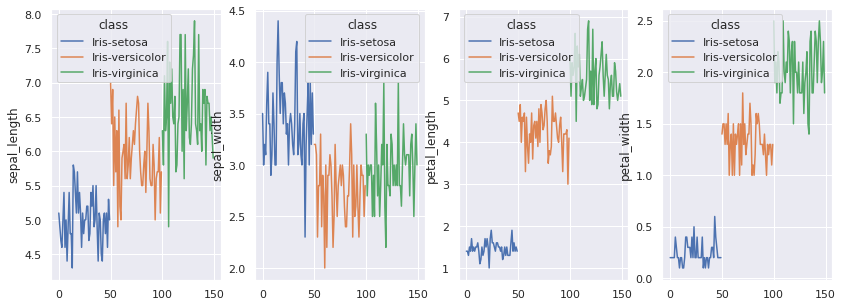

In [ ]:
'''
Line charts can also be plotted using seaborn.
By passing the flower type in the "hue" argument, we can plot each column per flower class and observe the characteristics of each flower class.
'''
sns.set(rc={'figure.figsize':(14,5)})
# get numerical columns
num_columns = iris.columns.drop(['class'])
# because we want to plot each observation in the dataset, we get the number of observations as the number of rows in the data
x_data = range(0, iris.shape[0])
#create as many plotting columns as the number of numerical columns
fig, ax = plt.subplots(1, len(num_columns)) ; i=0
# plot each column
for column in num_columns:
    sns.lineplot(data=iris, hue='class',y=column,x=x_data, ax=ax[i]); i+=1


In [ ]:
'''
Line charts using plotly
'''
import plotly.express as px

# get numerical columns
num_columns = iris.columns.drop(['class'])
# because we want to plot each observation in the dataset, we get the number of observations as the number of rows in the data
x_data = range(0, iris.shape[0])
# plot each column
for column in num_columns:
  fig = px.line(iris, x=x_data, y=column,color='class',
              line_group="class", hover_name="class",width=600, height=400, title=' Interactive Line charts using plotly')
  fig.show()

#### Boxplots and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

## boxplot

A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

![box plot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

<Figure size 648x504 with 0 Axes>

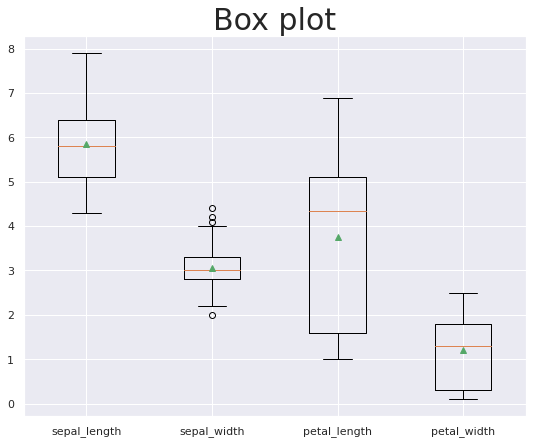

In [ ]:
'''
A Box Plot is a graphical method of displaying the five-number summary for numerical columns
Using Matplotlib
'''
#We drop the non-numerical columns: class
iris_num = iris.drop(columns='class')

plt.figure() ; fig,axes = plt.subplots(figsize=(9,7))  
plt.boxplot(iris_num.to_numpy(), labels= list(iris_num.columns), showmeans=True)

plt.title("Box plot" , fontsize=30)

plt.show()

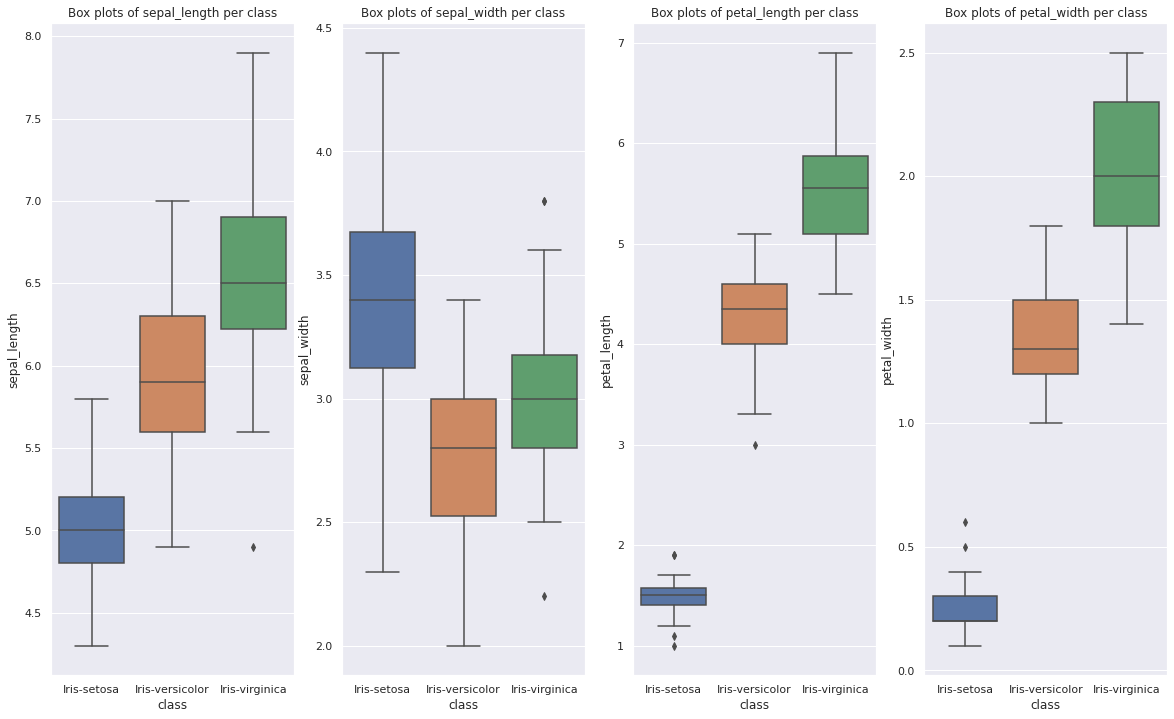

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,12))
'''
Here we use the seaborn package to plot boxplots per class for each of the four flower features.
'''
for i in range(len(iris_num.columns)):
  sns.boxplot(x = iris['class'], y=iris[iris.columns[i]], ax=ax[i]).set_title(f'Box plots of {iris.columns[i]} per class')

In [ ]:
'''
Using Plotly Package
'''
for i in range(len(iris_num.columns)):
  fig = px.box(iris, y=iris_num.columns[i], x="class",
                  width=400, height=600, title=' Interactive box plots')
  fig.show()

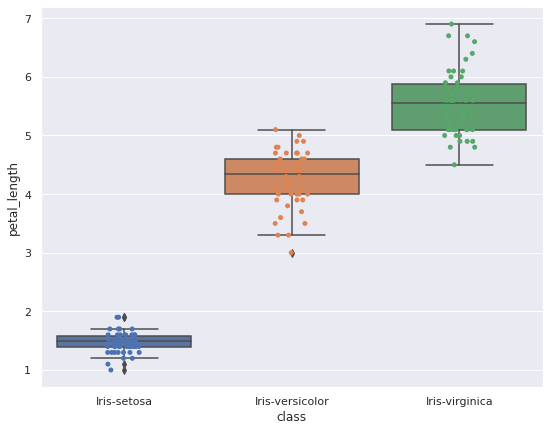

In [ ]:
'''
Use Seaborn's striplot to add data points on top of the box plot 
Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
Assign ax to each axis, so that each plot is ontop of the previous axis.
This can be repeated for the other attributes in the dataset.
''' 

ax= sns.boxplot(x="class", y="petal_length", data=iris)
ax= sns.stripplot(x="class", y="petal_length", data=iris, jitter=True, edgecolor="gray")
plt.show()

## violin plot

A violin plot shows the density of the data, simularly to a scatter plot, and presents catagorical data like a box plot.

**Denser regions of the data are fatter.**

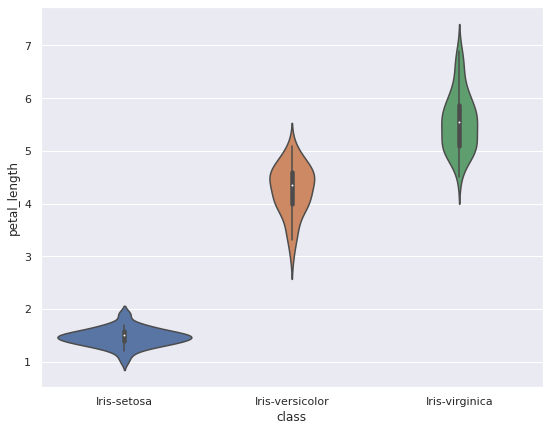

In [ ]:
sns.violinplot(x="class", y="petal_length", data=iris, size=6)
plt.show()

## kdeplot
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

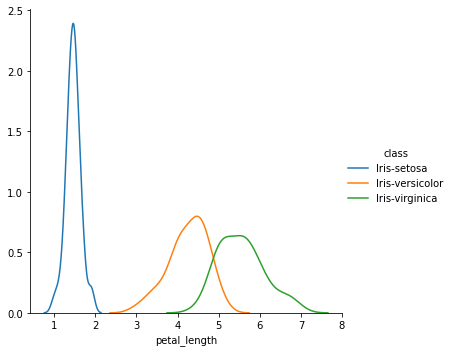

In [ ]:
'''
Seaborn's kdeplot, plots univariate or bivariate density estimates.
Size can be changed by tweeking the value used
'''
sns.FacetGrid(iris, hue="class", height=5) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()
plt.show()

## pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

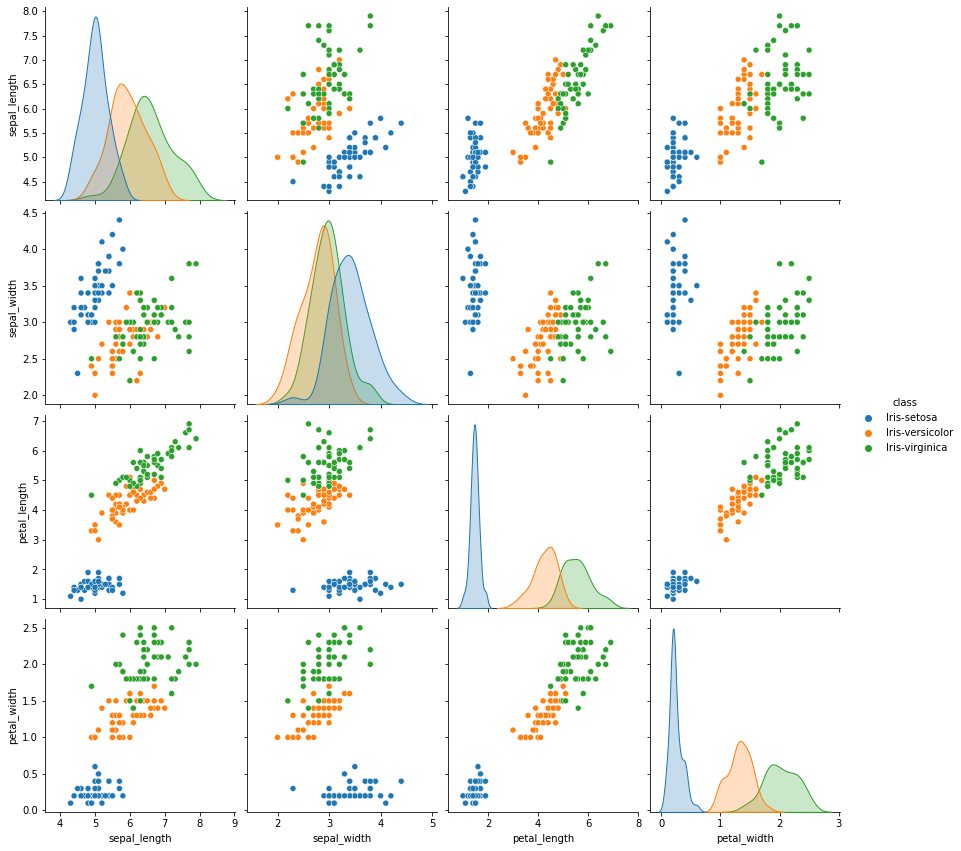

In [ ]:
'''
Use pairplot to analyze the relationship between species for all characteristic combinations. 
An observable trend shows a close relationship between two of the species
It simulateneously renders kde and scatter plots
'''
sns.pairplot(iris, hue="class", height=3)
plt.show()